#Computational Physics
Lecture 14b

In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
L=20
dim=35

def V(x):
  k=1.0
  return k*(x-L/2)**2

def bf(x,n): #nth basis function
  return np.sin(n*np.pi*x/L)*np.sqrt(2.0/L)
def genH(i,j): # returns the mtarix element of Hamiltonian, H_ij
  func = lambda x:np.conjugate(bf(x,i))*((np.pi*j/L)**2 + V(x))*bf(x,j)
  I = integrate.quad(func,0.0,L)[0]
  return I



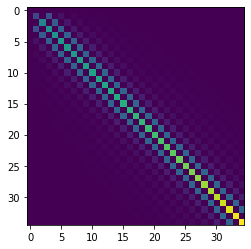

In [ ]:
H=np.zeros((dim,dim))

for i in range(dim):
  for j in range(dim):
    H[i,j]=genH(i,j)

plt.imshow(H)

In [ ]:
eval, vec=np.linalg.eigh(H)

[  0.           1.           3.           5.           7.00000001
   9.00000049  11.0000012   13.00003749  15.00006861  17.00123395
  19.00184847  21.01937066  23.0250064   25.15112336  27.17498057
  29.63905199  31.68914447  34.7265982   36.78655676  40.51171188
  42.54951232  47.0037936   48.98367411  54.19281682  56.07866272
  62.06934735  63.82507962  70.62679502  72.2162535   79.86660415
  81.25688578  89.90158006  91.11267235 103.7459213  105.09483543]


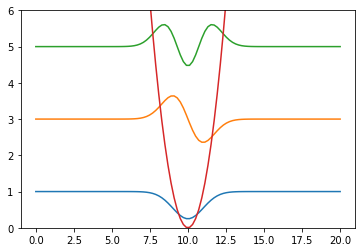

In [ ]:
def psi(x, coef): # returns the value of psi(x)=sum over (c_i * basis_function_i(x))
  tmp=0.0
  for i in range(dim):
    tmp+=coef[i]*bf(x,i)
  return tmp

print(eval)
xs=np.linspace(0,L,100)
plt.plot(xs,psi(xs,vec[:,1])+eval[1])
plt.plot(xs,psi(xs,vec[:,2])+eval[2])
plt.plot(xs,psi(xs,vec[:,3])+eval[3])

plt.ylim(0,6)
plt.plot(xs,V(xs)) #plot potential
plt.show()